In [1]:
# 53. Maximum Subarray
# Kadane算法

def max_subarray(A):
    max_ending_here = max_so_far = A[0]
    for x in A[1:]:
        max_ending_here = max(x, max_ending_here + x)
        max_so_far = max(max_so_far, max_ending_here)
    return max_so_far

                918. Maximum Sum Circular Subarray 

Given a circular integer array nums of length n, return the maximum possible sum of a non-empty subarray of nums.

A circular array means the end of the array connects to the beginning of the array. Formally, the next element of nums[i] is nums[(i + 1) % n] and the previous element of nums[i] is nums[(i - 1 + n) % n].

A subarray may only include each element of the fixed buffer nums at most once. Formally, for a subarray nums[i], nums[i + 1], ..., nums[j], there does not exist i <= k1, k2 <= j with k1 % n == k2 % n.

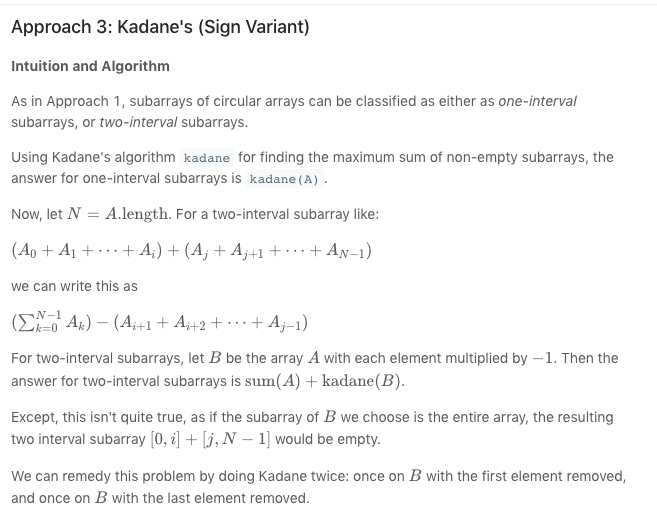


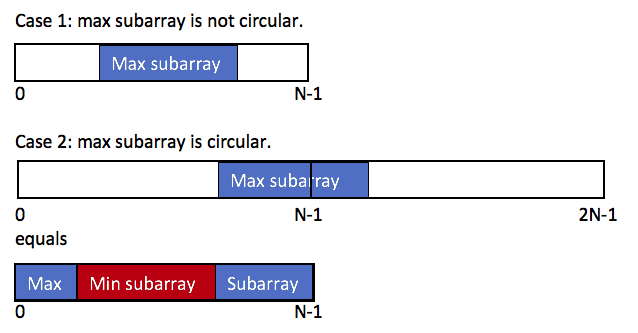


In [2]:
# 极端情况：如果说这数组的所有数都是负数，对于上面的第一种情况sum会等于数组中的最大值，
# 而对二种情况sum=0（最小的子数组就是本数组，total-total=0 因此要分 0:n-1 和 1:n
# 官方题解 python ( not working for py3)

class Solution(object):
    def maxSubarraySumCircular(self, A):
        
        def kadane(gen):
            # Maximum non-empty subarray sum
            ans = cur = None
            for x in gen:
                cur = x + max(cur, 0)
                ans = max(ans, cur)
            return ans
        
        S = sum(A)
        if len(A) == 1:
            return S
        
        ans1 = kadane(iter(A))
        ans2 = S + kadane(-A[i] for i in xrange(1, len(A)))
        ans3 = S + kadane(-A[i] for i in xrange(len(A) - 1))
        return max(ans1, ans2, ans3)


In [3]:
#py3 （recomannded) ： 极端情况一样，数组的所有数都是负数，直接返回该maxSubArray
#total为数组的总和，maxSum为最大子数组和，minSum为最小子数组和，curMax为包含当前元素的最大子数组和，curMin为包含当前元素的最小子数组和

class Solution(object):   
    def maxSubarraySumCircular(self, A):
        total, maxSum, curMax, minSum, curMin = 0, A[0], 0, A[0], 0
        for a in A:
            curMax = max(curMax + a, a)
            maxSum = max(maxSum, curMax)
            curMin = min(curMin + a, a)
            minSum = min(minSum, curMin)
            total += a
        return max(maxSum, total - minSum) if maxSum > 0 else maxSum


In [4]:
# 152. Maximum Product Subarray

class Solution(object):
    def maxProduct(self, nums):
        if len(nums) == 1:
            return nums[0]
        
        largest = math.prod(nums)
        
        if largest > 0:
            return largest
        
        max_to_cur = min_to_cur =  product = nums[0]
        for n in nums[1:]:
            max_to_cur, min_to_cur = max(max_to_cur*n, min_to_cur*n, n), min(max_to_cur*n, min_to_cur*n, n)
            product = max(product, max_to_cur)
            
        return product

In [6]:
#1567. Maximum Length of Subarray With Positive Product

class Solution:
    def getMaxLen(self, nums: List[int]) -> int:
        
        posi_len = 0
        nega_len = 0
        ans = 0
        
        for num in nums:
            if num==0:
                posi_len=nega_len = 0
            elif num<0:
                posi_len,nega_len = nega_len,posi_len
                nega_len += 1
                if posi_len>0:
                    posi_len += 1 
            else:
                posi_len += 1
                if nega_len>0:
                    nega_len += 1
            ans = max(ans,posi_len)
        
        return ans